In [876]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Download the data of all players who played in NBA in seasons 1996-97 to 2022-23 inclusively.
Data captures demographic variables such as age, height, weight and country of birth, biographical details like the team played for, draft year and round. In addition, it has basic box score statistics such as games played, average number of points, rebounds, assists, etc.

In [1071]:
df = pd.read_csv('data/all_seasons.csv')

In [1072]:
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [1073]:
df = df.drop(columns='Unnamed: 0')

In [1074]:
df.player_weight = round(df.player_weight, 1)
df.player_height = round(df.player_height, 1)

### Create binary variable to separate drafted and undrafted players.

In [1075]:
df['drafted_flag'] = np.where(df.draft_year == 'Undrafted', 0, 1)

In [1076]:
df_drafted = df[df.drafted_flag == 1]

In [1077]:
df_drafted.draft_year = df_drafted.draft_year.apply(lambda year: int(year))

### Clearing out the dataframe 'df_drafted' from players drafted later than in the 2nd round.
I delete all rows by column 'draft_round' containing values different from '1' or '2'.

In [1078]:
df_drafted = df_drafted.drop(df_drafted[~(df_drafted.draft_round.isin(['1', '2']))].index)

In [1079]:
df_drafted.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,drafted_flag
0,Randy Livingston,HOU,22.0,193.0,94.8,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97,1
1,Gaylon Nickerson,WAS,28.0,190.5,86.2,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97,1
2,George Lynch,VAN,26.0,203.2,103.4,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97,1
3,George McCloud,LAL,30.0,203.2,102.1,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97,1
4,George Zidek,DEN,23.0,213.4,119.7,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97,1


In [1080]:
df_undrafted = df[df.drafted_flag == 0]

In [1081]:
df_undrafted[['draft_year', 'draft_round', 'draft_number']] = \
df_undrafted[['draft_year', 'draft_round', 'draft_number']].replace('Undrafted', np.nan)

In [1082]:
df_undrafted.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,drafted_flag
29,Emanual Davis,HOU,28.0,195.6,88.0,Delaware State,USA,NaN,NaN,NaN,13,5.0,1.7,2.0,6.6,0.011,0.098,0.144,0.565,0.191,1996-97,0
39,Erick Strickland,DAL,23.0,190.5,95.3,Nebraska,USA,NaN,NaN,NaN,28,10.6,3.2,2.4,-6.4,0.032,0.112,0.216,0.510,0.161,1996-97,0
41,Evric Gray,NJN,27.0,200.7,106.6,Nevada-Las Vegas,USA,NaN,NaN,NaN,5,2.6,0.6,0.4,17.5,0.026,0.049,0.192,0.388,0.065,1996-97,0
46,Henry James,ATL,31.0,203.2,99.8,St. Mary's (TX),USA,NaN,NaN,NaN,53,6.7,1.5,0.4,1.2,0.034,0.067,0.171,0.555,0.036,1996-97,0
54,Jimmy Carruth,MIL,27.0,208.3,120.2,Virginia Tech,USA,NaN,NaN,NaN,4,1.3,1.0,0.0,-17.7,0.000,0.211,0.103,0.727,0.000,1996-97,0


### Combine dataframes back together.

In [1083]:
df = pd.concat([df_drafted, df_undrafted]).reset_index(drop=True)

### Define outliers. 
Find outliers in 'age' and 'height', check if they affect the measurements and eliminate them if needed.

<Axes: xlabel='drafted_flag', ylabel='age'>

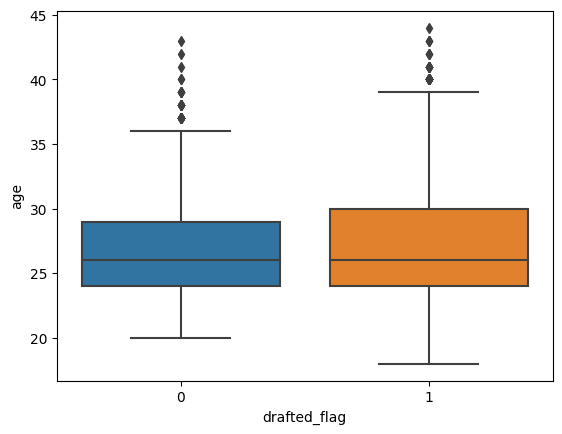

In [754]:
sns.boxplot(x=df.drafted_flag, y=df.age)

In [755]:
df.age.describe()

count    12741.000000
mean        27.022683
std          4.327384
min         18.000000
25%         24.000000
50%         26.000000
75%         30.000000
max         44.000000
Name: age, dtype: float64

In [756]:
Q1 = 24
Q3 = 30
IQR = Q3 - Q1

In [757]:
iqr_bottom = Q1 - 1.5 * IQR
iqr_top = Q3 + 1.5 * IQR
print(iqr_bottom, iqr_top)

15.0 39.0


In [758]:
df[df.age > iqr_top].sort_values('age', ascending=False).head(10)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,drafted_flag
4025,Kevin Willis,DAL,44.0,213.4,111.1,Michigan State,USA,1984.0,1,11,5,2.4,1.6,0.2,11.9,0.063,0.222,0.184,0.432,0.034,2006-07,1
9060,Vince Carter,ATL,43.0,198.1,99.8,North Carolina,USA,1998.0,1,5,60,5.0,2.1,0.8,-8.1,0.019,0.114,0.163,0.470,0.081,2019-20,1
4515,Dikembe Mutombo,HOU,43.0,218.4,117.9,Georgetown,Congo,1991.0,1,4,9,1.8,3.7,0.0,1.8,0.152,0.241,0.111,0.472,0.000,2008-09,1
186,Robert Parish,CHI,43.0,215.9,110.7,Centenary (LA),USA,1976.0,1,8,43,3.7,2.1,0.5,14.9,0.114,0.130,0.201,0.514,0.082,1996-97,1
12624,Udonis Haslem,MIA,43.0,200.7,106.6,Florida,USA,NaN,NaN,NaN,7,3.9,1.6,0.0,-11.8,0.047,0.101,0.185,0.433,0.000,2022-23,0
4100,Dikembe Mutombo,HOU,42.0,218.4,117.9,Georgetown,Congo,1991.0,1,4,39,3.0,5.1,0.1,3.6,0.118,0.221,0.086,0.591,0.012,2007-08,1
2986,Kevin Willis,ATL,42.0,213.4,111.1,Michigan State,USA,1984.0,1,11,29,3.0,2.6,0.3,-15.5,0.091,0.164,0.151,0.434,0.043,2004-05,1
12440,Udonis Haslem,MIA,42.0,203.2,106.6,Florida,USA,NaN,NaN,NaN,13,2.5,1.9,0.3,-9.5,0.043,0.239,0.183,0.495,0.077,2021-22,0
8613,Vince Carter,ATL,42.0,198.1,99.8,North Carolina,USA,1998.0,1,5,76,7.4,2.6,1.1,-6.3,0.021,0.114,0.164,0.565,0.097,2018-19,1
773,Herb Williams,NYK,41.0,210.8,117.9,Ohio State,USA,1981.0,1,14,6,1.7,1.0,0.0,0.9,0.088,0.103,0.138,0.563,0.000,1998-99,1


**No incorrect data found - no need to delete outliers**

### Delete columns with unneccesary stats from the table.

In [1084]:
df = df.drop(df.iloc[:, 14:18], axis=1)

### Add 'season_year' column capturing the first year from 'season' in datetime format.

In [1085]:
df['season_year'] = df.season.apply(lambda str: str[:4])

In [1086]:
df.season_year = pd.to_datetime(df.season_year, format='%Y')

In [1087]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,ts_pct,ast_pct,season,drafted_flag,season_year
0,Randy Livingston,HOU,22.0,193.0,94.8,Louisiana State,USA,1996.0,2,42,64,3.9,1.5,2.4,0.487,0.248,1996-97,1,1996-01-01
1,Gaylon Nickerson,WAS,28.0,190.5,86.2,Northwestern Oklahoma,USA,1994.0,2,34,4,3.8,1.3,0.3,0.497,0.043,1996-97,1,1996-01-01
2,George Lynch,VAN,26.0,203.2,103.4,North Carolina,USA,1993.0,1,12,41,8.3,6.4,1.9,0.512,0.125,1996-97,1,1996-01-01
3,George McCloud,LAL,30.0,203.2,102.1,Florida State,USA,1989.0,1,7,64,10.2,2.8,1.7,0.527,0.125,1996-97,1,1996-01-01
4,George Zidek,DEN,23.0,213.4,119.7,UCLA,USA,1995.0,1,22,52,2.8,1.7,0.3,0.500,0.064,1996-97,1,1996-01-01


### Adjust dataset and try to realize if height and age affected on round and pick numbers.

In [1215]:
# make up a dataframe with unique players only for further analysis.
df_unique = df.drop_duplicates('player_name')

In [1216]:
# convert str type values from 'draft_number' column to 'int'
df_unique.draft_number = \
df_unique.draft_number.apply(lambda num: int(num) if pd.notnull(num) else np.nan)

In [864]:
# filter out the players who were selected on draft and had their first year in the league
df_drafted = df_unique[(df_unique.drafted_flag == 1) & (df_unique.draft_year >= 1996)]

In [865]:
print(df_drafted.player_height.mean())
print(df_drafted.player_height.median())

201.08198133524763
200.7


In [866]:
df_drafted.groupby(df_drafted.draft_round)['player_height'].mean()

draft_round
1    201.537641
2    200.472651
Name: player_height, dtype: float64

In [776]:
result = \
df_unique[df_unique.draft_number < 10].groupby('college')['player_name'].count().sort_values(ascending=False).head(5)

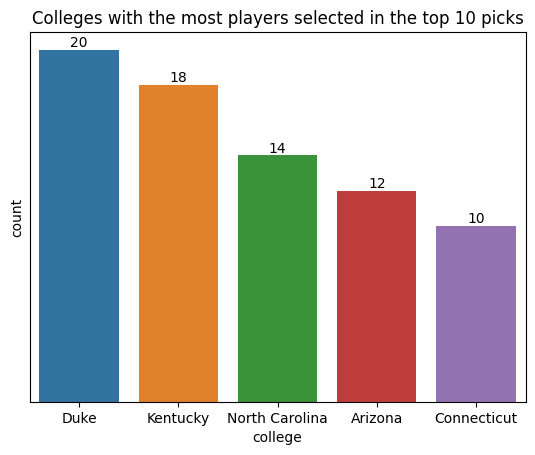

In [777]:
barplot = sns.barplot(x=result.index, y=result.values)
plt.title('Colleges with the most players selected in the top 10 picks')

for i in range(len(result.index)):
    barplot.text(x=i, y=result.values[i], s=result.values[i], ha='center', va='bottom')

plt.yticks(ticks=[])
plt.ylabel('count')
plt.show()

In [908]:
# check how age and height affect the draft number using Pearson coefficient
df_drafted.corr(numeric_only=True)['draft_number']

age              0.416458
player_height   -0.089536
player_weight   -0.037452
draft_year       0.051612
draft_number     1.000000
gp              -0.494208
pts             -0.531182
reb             -0.457190
ast             -0.326327
ts_pct          -0.110448
ast_pct         -0.045839
drafted_flag          NaN
Name: draft_number, dtype: float64

In [902]:
# check how age and height affect the draft round (binary variable) using Point Biserial
df_biserial = df_drafted[['age', 'player_height', 'draft_round']]
df_biserial['draft_round_bi'] = df_biserial['draft_round'].map({'1': 1, '2': 0})
ss.pointbiserialr(df_biserial['draft_round_bi'], df_biserial['age'])

SignificanceResult(statistic=-0.3590566895503701, pvalue=1.2098476038720797e-43)

In [903]:
ss.pointbiserialr(df_biserial['draft_round_bi'], df_biserial['player_height'])

SignificanceResult(statistic=0.06060344830096382, pvalue=0.02370073459878269)

In [906]:
df_biserial_2 = df_unique[['player_height', 'age', 'drafted_flag']]
ss.pointbiserialr(df_biserial_2['drafted_flag'], df_biserial_2['player_height'])

SignificanceResult(statistic=0.1529074807686811, pvalue=1.3539644280171903e-14)

In [914]:
df_biserial_2 = df_unique[df_unique.age < 30][['player_height', 'age', 'drafted_flag']]
ss.pointbiserialr(df_biserial_2['drafted_flag'], df_biserial_2['age'])

SignificanceResult(statistic=-0.3683103762683956, pvalue=4.046052674583158e-76)

**According to the results of the analysis we can see that**<br>
1) height has almost no effect on the selection of a player in the draft<br>
2) age has a noticeable effect on the pick number, round and whether or not the player will be drafted at all.<br>

**Let's try to predict the probability that a player will be selected in the draft, given his age, using linear regression.**

### Predictive analysis.

In [940]:
# check for multicollinearity
df_biserial_2.corr()['age']

player_height   -0.05942
age              1.00000
drafted_flag    -0.36831
Name: age, dtype: float64

In [924]:
X = sm.add_constant(df_biserial_2[['age', 'player_height']] - df_biserial_2[['age', 'player_height']].mean())  # centering around mean values
y = df_biserial_2.drafted_flag

logit = sm.Logit(y, X)
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.544838
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           drafted_flag   No. Observations:                 2341
Model:                          Logit   Df Residuals:                     2338
Method:                           MLE   Df Model:                            2
Date:                Tue, 17 Oct 2023   Pseudo R-squ.:                  0.1281
Time:                        19:59:04   Log-Likelihood:                -1275.5
converged:                       True   LL-Null:                       -1462.9
Covariance Type:            nonrobust   LLR p-value:                 4.167e-82
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8950      0.050     17.899      0.000       0.797       0.993
age              -0.3783      0.023    -16.358      0.000      -0.424      -0.333
player_height     0.0380      0.005      6.935      0.000       0.027       0.049
=================================================================================
"""

In [930]:
np.exp(0.8950)  
# For a player of mean age and a mean height relative to other players in the draft, 
# the probability of being selected increases by 2.45 times.

2.447335789462311

In [931]:
np.exp(-0.3783) 
# As a player's age increases by 1 year (from mean age),
# the probability of selecting him in the draft decreases by one-third.

0.6850249623479597

In [935]:
np.exp(0.0380) # Player's height has relatively no affection on propability to be selected.

1.0387312328784977

### Pull out geographical data from another dataset 'Players' to get each player's city and country (state if from the US) of birth.
Complete the dataframe with information about the birth date of each player.

In [837]:
players = pd.read_csv('data/Players.csv')

In [838]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3921 non-null   int64 
 1   Player       3921 non-null   object
 2   height       3921 non-null   int64 
 3   weight       3921 non-null   int64 
 4   collage      3573 non-null   object
 5   born         3921 non-null   int64 
 6   birth_city   3452 non-null   object
 7   birth_state  3439 non-null   object
dtypes: int64(4), object(4)
memory usage: 245.2+ KB


In [839]:
players = players.rename(columns={'Player': 'player_name'})

In [1217]:
df_unique = \
df_unique.merge(players[['player_name', 'birth_city', 'birth_state']], how='left')

In [949]:
state_names = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "District of Columbia", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

**Make some replacements in 'country' column.**

In [1219]:
df_unique.country = df_unique.country.replace(['Bosnia', 'Bosnia & Herzegovina'], 'Bosnia and Herzegovina')

In [1220]:
df_unique.country = df_unique.country.replace(['DRC'], 'Democratic Republic of the Congo')

In [1221]:
df_unique.country = df_unique.country.replace(['England', 'Scotland', 'Great Britain'], 'United Kingdom')

In [1222]:
df_unique.country = df_unique.country.replace(['Sudan (UK)'], 'South Sudan')

In [1223]:
df_unique.country = df_unique.country.replace(['US Virgin Islands'], 'U.S. Virgin Islands')

In [1224]:
df_unique.country = df_unique.country.replace(['USSR'], 'Lithuania')

In [1225]:
df_unique.country = df_unique.country.replace(['Serbia', 'Serbia and Montenegro'], 'Serbia')

In [1226]:
df_unique.loc[568,'country'] = df_unique.loc[568,'birth_state']
df_unique.loc[581,'country'] = df_unique.loc[581,'birth_state']
df_unique.loc[1879,'country'] = df_unique.loc[1879,'birth_state']
df_unique.loc[1894,'country'] = df_unique.loc[1894,'birth_state']

**Clear out 'birth_state' column from places that are not US states.**

In [1160]:
country_indexes = df_unique[(~df_unique.birth_state.isin(state_names)) &
                            (~df_unique.birth_state.isnull())]['birth_state'].index

In [1228]:
df_unique.loc[country_indexes, 'birth_state'] = np.nan

In [1229]:
df_unique.birth_state.isnull().sum()

1079

### Delete unneeded columns from dataframes 'df' and 'df_unique'.

In [1232]:
df_unique.drop(columns=df_unique.columns[10:17], inplace=True)

In [1235]:
df_unique.drop(columns=df_unique.columns[11], inplace=True)

In [1239]:
df_unique.drop(columns=df_unique.columns[2], inplace=True)

In [1240]:
df_unique.head()

,player_name,team_abbreviation,player_height,player_weight,college,country,draft_year,draft_round,draft_number,drafted_flag,birth_city,birth_state
0,Randy Livingston,HOU,193.0,94.8,Louisiana State,USA,1996.0,2,42.0,1,New Orleans,Louisiana
1,Gaylon Nickerson,WAS,190.5,86.2,Northwestern Oklahoma,USA,1994.0,2,34.0,1,Osecola,Arkansas
2,George Lynch,VAN,203.2,103.4,North Carolina,USA,1993.0,1,12.0,1,Roanoke,Virginia
3,George McCloud,LAL,203.2,102.1,Florida State,USA,1989.0,1,7.0,1,Daytona Beach,Florida
4,George Zidek,DEN,213.4,119.7,UCLA,USA,1995.0,1,22.0,1,Zlin,NaN


In [1247]:
df.drop(columns=df.columns[3:10], inplace=True)

In [1249]:
df.drop(columns=df.columns[10], inplace=True)

In [1254]:
df_unique.draft_year = pd.to_datetime(df_unique.draft_year, format='%Y')

In [1262]:
df.to_csv('viz/NBA_by_seasons.csv', index=False)

In [1263]:
df_unique.to_csv('viz/NBA_unique_players.csv', index=False)